# IMPORTAR LIBRERÍAS

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Split X train y test
from sklearn.model_selection import train_test_split

# Modelos para validación cruzada con cross_val_score y cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelos para validar por regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Validación de modelos:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Calificación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.metrics import make_scorer


# Para imputación categórica a numérica y predicción de columna numérica Destruction Level en Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Convertir columnas categóricas (Disaster Subtype, Origin, Associated Disaster) a numéricas para predecir Destruction Level Dis o Mag Value
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
# Pipeline
from sklearn.pipeline import Pipeline
import joblib # guardar pipeline

In [3]:
df = pd.read_csv('../../99 PRUEBAS a los CSV/01 Prueba quitando eventos/04DesNat_DEFS_limpio_fc.csv')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [25]:
df.shape

(12826, 26)

In [26]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'South America', 'Western Europe', 'Eastern Asia', 'Caribbean',
       'Northern Africa', 'Northern America', 'South-Eastern Asia',
       'Eastern Europe', 'Southern Europe', 'Melanesia', 'Polynesia',
       'Eastern Africa', 'Northern Europe', 'Western Asia',
       'Australia and New Zealand', 'Micronesia', 'Southern Africa',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

Hay 23 regiones. Demasiadas para codificar???. Pensar en codificar por continente

## Tratamiento de nulos: en nuestro caso 0

In [39]:
df_filtrado = df.loc[(df['Total Affected'] != 0)]
df_filtrado.shape

(9644, 26)

### Usando One Hot Encoder para codificar las categóricas


In [40]:
categoricals = df_filtrado[['Disaster Type', 'Region']]
categoricals.head()

,Disaster Type,Region
23,Storm,Northern America
25,Earthquake,South-Eastern Asia
26,Flood,Eastern Asia
30,Flood,Eastern Asia
38,Drought,Eastern Asia


In [41]:
categoricals.shape

(9644, 2)

In [42]:
df_numericals= df_filtrado[['Year', 'Total Affected']]
df_numericals.head()

,Year,Total Affected
23,1912,2700
25,1914,20
26,1915,3000000
30,1917,635000
38,1920,20000000


In [43]:
df_numericals.shape

(9644, 2)

In [44]:
categoricals = df_filtrado[['Disaster Type', 'Region']]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
categorials_encoded = onehot_encoder.fit_transform(categoricals)

column_names = onehot_encoder.get_feature_names_out(categoricals.columns)

df_categoricals = pd.DataFrame(categorials_encoded, columns=column_names)
df_categoricals.head()

C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm,Region_Caribbean,Region_Central America,Region_Central Asia,Region_Eastern Africa,Region_Eastern Asia,Region_Eastern Europe,Region_Melanesia,...,Region_Polynesia,Region_Russian Federation,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_categoricals.index = df_filtrado.index

In [46]:
df_modelo = pd.concat([df_categoricals, df_numericals], axis=1)
df_modelo.head(2)

,Disaster Type_Earthquake,Disaster Type_Flood,Disaster Type_Storm,Region_Caribbean,Region_Central America,Region_Central Asia,Region_Eastern Africa,Region_Eastern Asia,Region_Eastern Europe,Region_Melanesia,...,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe,Year,Total Affected
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1912,2700
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1914,20


In [47]:
df_modelo.shape


(9644, 27)

## train_test_split

In [36]:
X = df_modelo.drop(['Total Affected'], axis=1)
y= df_modelo['Total Affected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape} {y_train.shape}")
print(f"Test: {X_test.shape} {y_test.shape}")

Entrenamiento: (7715, 26) (7715,)
Test: (1929, 26) (1929,)


### RandomForestClassifier

In [37]:
modelval_rfc = RandomForestClassifier()
cv_scores_rfc = cross_val_score(modelval_rfc, X, y, scoring='neg_mean_absolute_error')

print("Calificaciones Cross-Validation de RandomForestClassifier:")
print(cv_scores_rfc)
print("Mean Accuracy:", cv_scores_rfc.mean())
print("Standard Deviation:", cv_scores_rfc.std())

C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Calificaciones Cross-Validation de RandomForestClassifier:
[-1572400.14981856               nan               nan               nan
               nan]
Mean Accuracy: nan
Standard Deviation: nan


C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py", line 456, in fi

## cross_val_score

In [21]:
from sklearn.model_selection import cross_val_score

models = [
    ('Linearregression', LinearRegression()),
    ('KNN', KNeighborsRegressor)
]
cv_results = []
test_results = []
names = []

for name, model in models:
    names.append(name)

    cv_results.append(cross_val_score(model, X, y, scoring='f1'))

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    test_results.append(f1_score(y_test, y_pred))
                

print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
  File "C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\utils

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

<Axes: >

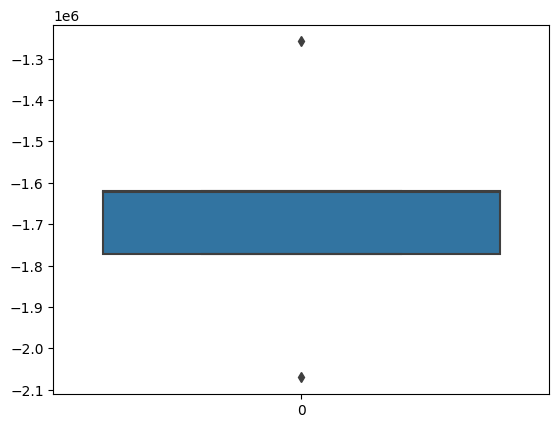

In [18]:
sns.boxplot(data=cv_results)

In [19]:
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[-1.10918186e+14 -7.85894773e+13 -7.34341952e+13 -7.70643328e+13
 -4.58866675e+12]
mean: -68918971535402.6, std: 34878574900431.332
